In [41]:
import torch
import torch.nn
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn as nn

In [6]:
train_rawdata = datasets.MNIST(root = 'data', # 경로 의미하는 것임
                               train=True, # 참 -> 트레인 데이터, 거짓 ->  테스트데이터 줌
                               download=True, # 다운
                               transform = transforms.ToTensor()) # 텐서로 바꿔
test_dataset = datasets.MNIST(root = 'dataset',
                               train=False,
                               download=True,
                               transform = transforms.ToTensor)
print('number of training data: ', len(train_rawdata))
print('number of test data: ', len(test_dataset))

number of training data:  60000
number of test data:  10000


In [11]:
VALIDATION_RATE = 0.2
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_rawdata)), # x index번호
    train_rawdata.targets, # y
    stratify = train_rawdata.targets,
    test_size=VALIDATION_RATE
)

In [14]:
train_dataset = Subset(train_rawdata, train_indices) # 주어진 인덱스에 해당하는 것만 가져온다.
# train_rawdata 는 train 의 전체 데이터
# 여기서 train과 val로 나눴으니 새로운 train 들을 선택해야 함
# 그래서 Subset을 이용함
validation_dataset = Subset(train_rawdata, val_indices)

In [15]:
# 데이터셋 확인
print( len (train_dataset), len(validation_dataset), len(test_dataset))

48000 12000 10000


In [24]:
# 미니배치 
batch_size = 128
train_batches = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataset = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)
test_dataset = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [28]:
x_train, y_train = next(iter(train_batches)) # 하나만 가져와서 모양 보기
print(x_train.shape, y_train.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [34]:
x_train[index, :, :, :].shape

torch.Size([1, 28, 28])

In [35]:
x_train[index, :, :, :].numpy().reshape(28, 28).shape

(28, 28)

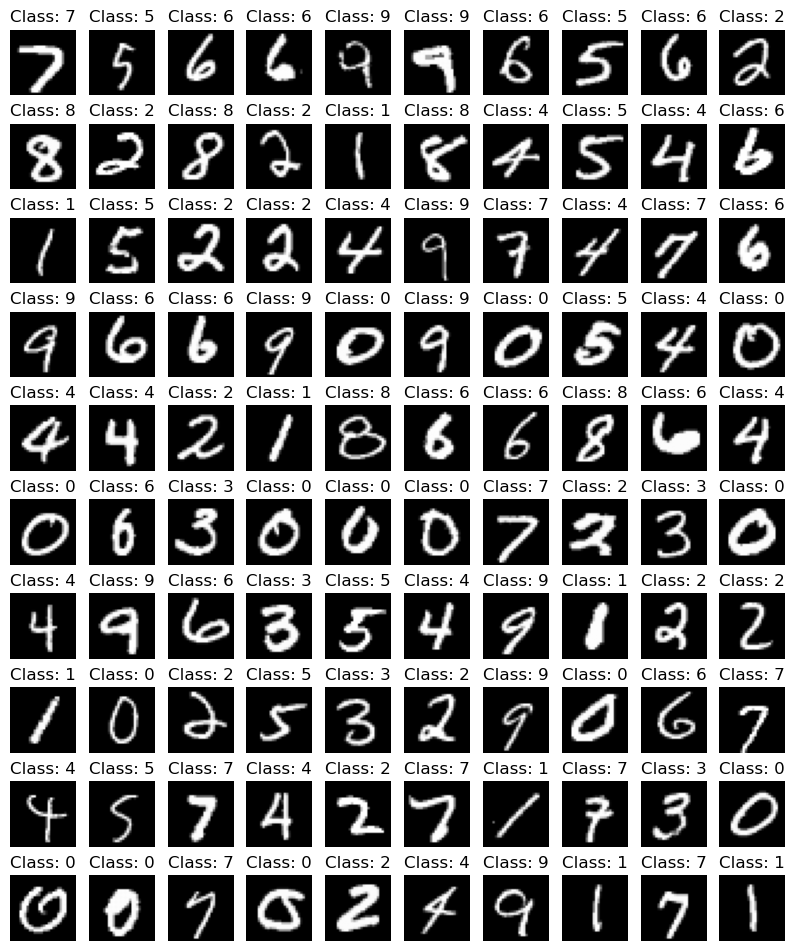

In [32]:
# %matplotlib inline

plt.figure(figsize=(10,12))

for index in range(100):
    plt.subplot(10, 10, index + 1)
    plt.axis('off')
    plt.imshow(x_train[index,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: ' + str(y_train[index].item()))

In [36]:
# 미니배치 하나만 가져와서 이미지 visualization
x_train, y_train = next(iter(train_batches))
print(x_train.shape, y_train.shape)
print(x_train.size(0))
print(x_train.view(x_train.size(0), -1).shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])
128
torch.Size([128, 784])


In [42]:
class Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.linear_layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0, 1),
            nn.Linear(256,256),
            nn.LeakyReLU(0, 1),
            nn.Linear(256,128),
            nn.LeakyReLU(0,1),
            nn.Linear(128, output_dim),
            nn.LogSoftmax(dim=-1)
        )

    def forward(self, x):
        y = self.linear_layers(x)
        return y
        

In [45]:
minibatch_size = 128
input_dim = 28*28
output_dim = 10
model = Model(input_dim, output_dim)

loss_func = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# save best model